In [3]:
from NRoutines.preprocess import assem_files_w_msh
from NRoutines.assembling import DME_heat, assembler_heat, loadasem
from NRoutines.postprocesor import complete_disp, temperature_gradients_nodes, fields_plot
import numpy as np

In [4]:
nodes, mats, elements, loads = assem_files_w_msh(r"files/cold_plate.msh",heat_load=10.0, ele_type="quad")

In [5]:
DME, IBC, neq = DME_heat(nodes, elements)
KG = assembler_heat(elements, mats, nodes, neq, DME, nnodes=4, ele_type="quad")
RHS = loadasem(loads, IBC, neq)
UG = np.linalg.solve(KG, RHS)
UC = complete_disp(IBC, nodes, UG)
Et, Qt = temperature_gradients_nodes(nodes, elements, mats, UC)

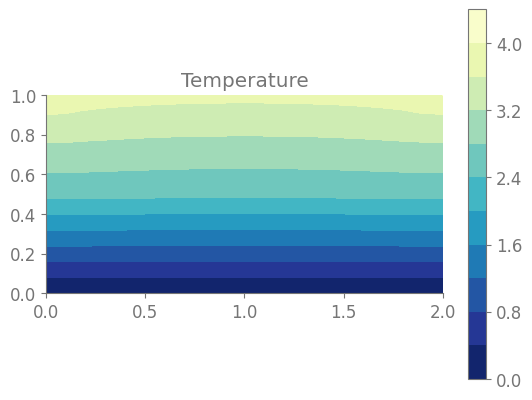

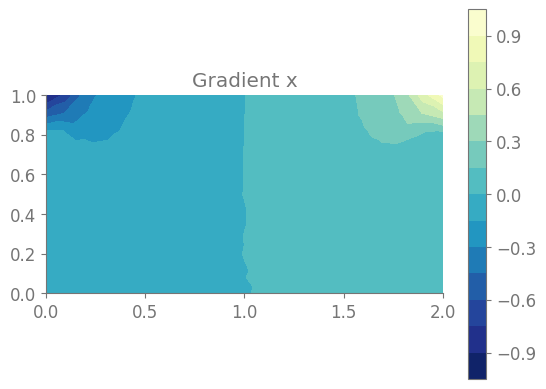

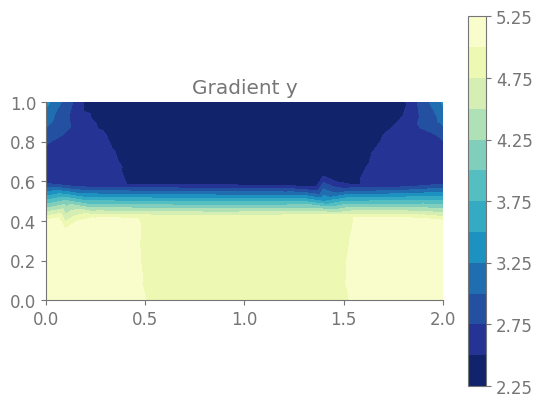

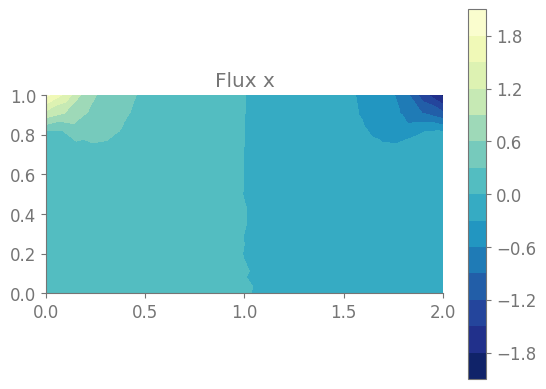

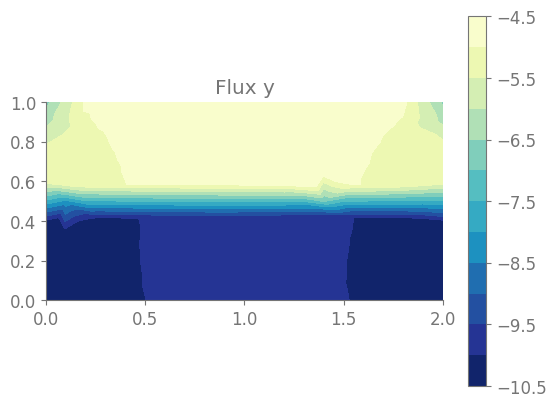

In [6]:
fields_plot(elements, nodes ,UC,ele_type="quad",gradients=Et,fluxes=Qt)